<center/>
<h1>Word Embedding</h1>
<h9>Amir Mohammad Fakhimi</h9>

## WordNet

WordNet is a large lexical database of English:
- Synsets (sets of cognitive synonyms) group words by meaning.
- Synsets are linked by semantic relations:
    - Hypernyms ("is-a" relations, e.g. dog -> canine)
    - Hyponyms (more specific terms, e.g. canine -> dog, wolf)
    - Antonyms, meronyms (part-of), holonyms (whole-of), etc.
- You can query definitions, example sentences, and compute simple semantic similarities (e.g. path similarity) between synsets.


In [1]:
import nltk
# nltk.download("wordnet")
from nltk.corpus import wordnet as wn

In [2]:
synsets = wn.synsets("bank")
print("Synsets of 'bank':")
for s in synsets:
    print(f"  - {s.name():20s} → {s.definition()}")

Synsets of 'bank':
  - bank.n.01            → sloping land (especially the slope beside a body of water)
  - depository_financial_institution.n.01 → a financial institution that accepts deposits and channels the money into lending activities
  - bank.n.03            → a long ridge or pile
  - bank.n.04            → an arrangement of similar objects in a row or in tiers
  - bank.n.05            → a supply or stock held in reserve for future use (especially in emergencies)
  - bank.n.06            → the funds held by a gambling house or the dealer in some gambling games
  - bank.n.07            → a slope in the turn of a road or track; the outside is higher than the inside in order to reduce the effects of centrifugal force
  - savings_bank.n.02    → a container (usually with a slot in the top) for keeping money at home
  - bank.n.09            → a building in which the business of banking transacted
  - bank.n.10            → a flight maneuver; aircraft tips laterally about its longitud

In [3]:
s0 = synsets[0]
print(f"Example Synonyms for {s0.name()}:")
print([lem.name() for lem in s0.lemmas()])
print("Examples:", s0.examples())

Example Synonyms for bank.n.01:
['bank']
Examples: ['they pulled the canoe up on the bank', 'he sat on the bank of the river and watched the currents']


In [4]:
print(f"Hypernyms of {s0.name()}:")
for h in s0.hypernyms():
    print("  -", h.name(), ":", h.definition())

Hypernyms of bank.n.01:
  - slope.n.01 : an elevated geological formation


In [5]:
print(f"Hyponyms of {s0.name()}:")
for h in s0.hyponyms()[:5]:
    print("  -", h.name(), ":", h.definition())

Hyponyms of bank.n.01:
  - riverbank.n.01 : the bank of a river
  - waterside.n.01 : land bordering a body of water


In [6]:
dog = wn.synset("dog.n.01")
cat = wn.synset("cat.n.01")
sim = dog.path_similarity(cat)
print(f"Path similarity between {dog.name()} and {cat.name()}: {sim:.2f}")

Path similarity between dog.n.01 and cat.n.01: 0.20


In [7]:
dog1 = wn.synset("dog.n.01")
dog2 = wn.synset("dog.n.01")
sim = dog1.path_similarity(dog2)
print(f"Path similarity between {dog1.name()} and {dog2.name()}: {sim:.2f}")

Path similarity between dog.n.01 and dog.n.01: 1.00


In [8]:
good = wn.synset("good.a.01")
antonyms = set()
for lemma in good.lemmas():
    for ant in lemma.antonyms():
        antonyms.add(ant.name())

print("Antonyms of 'good':", antonyms)

Antonyms of 'good': {'bad'}


## Word2Vec (Skip-Gram)

Rather than training from scratch, we can load a pre-trained Skip-Gram model (e.g. Google's News vectors).

In [13]:
import gensim.downloader as api

print("Loading pre-trained Word2Vec (Google News 300d)...")
model = api.load("word2vec-google-news-300")

ModuleNotFoundError: No module named 'gensim'

In [10]:
import nltk
# nltk.download("brown")
from nltk.corpus import brown
from gensim.models import Word2Vec

ModuleNotFoundError: No module named 'gensim'

In [ ]:
# List of tokenized sentences
sentences = brown.sents()
sentences[0]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of',
 "Atlanta's",
 'recent',
 'primary',
 'election',
 'produced',
 '``',
 'no',
 'evidence',
 "''",
 'that',
 'any',
 'irregularities',
 'took',
 'place',
 '.']

In [12]:
model = Word2Vec(
    sentences,
    vector_size=100,  # embedding dimensionality
    window=5,  # context window
    min_count=5,  # ignore infrequent words
    sg=1,  # 1 = skip-gram; 0 = CBOW
    workers=2,
    epochs=5
)

NameError: name 'Word2Vec' is not defined

- Find similar words via cosine similarity

In [ ]:
print("Top 8 words similar to 'government':")
for word, sim in model.wv.most_similar('government', topn=8):
    print(f"  {word:12s} -> {sim:.3f}")

Top 8 words similar to 'government':
  governments  -> 0.871
  federal      -> 0.866
  cooperation  -> 0.866
  trade        -> 0.862
  Communist    -> 0.858
  assist       -> 0.852
  financial    -> 0.852
  union        -> 0.850


- Solve analogies (e.g. "king – man + woman = queen")

In [ ]:
print("Analogy: king - man + woman =")
for word, sim in model.wv.most_similar(positive=["king", "woman"], negative=["man"], topn=5):
    print(f"  {word:12s} -> {sim:.3f}")

Analogy: king - man + woman =
  singing      -> 0.829
  Kowalski     -> 0.825
  lover        -> 0.823
  widowed      -> 0.822
  uncle        -> 0.821


- Detect odd-one-out in a list of words

In [ ]:
words = ["breakfast", "cereal", "dinner", "lunch"]
odd = model.wv.doesnt_match(words)
print(f"Odd one out in {words}: {odd}")

Odd one out in ['breakfast', 'cereal', 'dinner', 'lunch']: cereal


- Project high-dimensional embeddings into 2D for visualization

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

targets = ["king", "queen", "man", "woman", "government", "law", "people", "society"]
vectors = [model.wv[w] for w in targets]

len(vectors), len(vectors[0])

(8, 100)

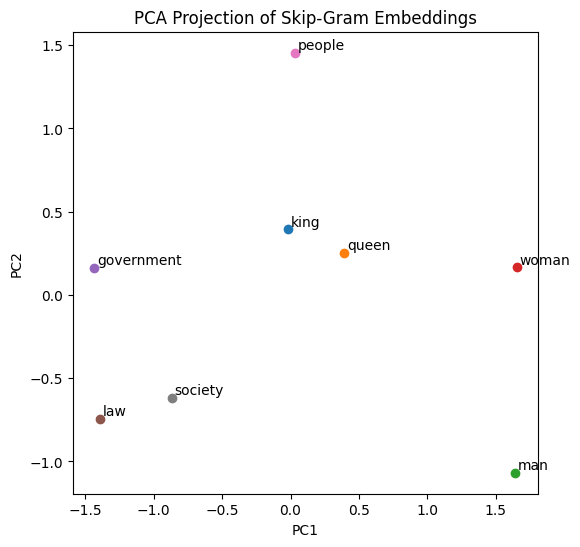

In [ ]:
coords = PCA(n_components=2).fit_transform(vectors)

plt.figure(figsize=(6, 6))
for (x, y), w in zip(coords, targets):
    plt.scatter(x, y)
    plt.text(x + 0.02, y + 0.02, w)

plt.title("PCA Projection of Skip-Gram Embeddings")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## FastText (Embedding & Classification)

### Embedding

In [ ]:
import nltk
# nltk.download('brown')
from nltk.corpus import brown
from gensim.models import FastText

In [ ]:
sentences = brown.sents()

ft_model = FastText(
    sentences,
    vector_size=100,  # embed dim
    window=5,
    min_count=5,
    sg=1,  # skip-gram
    workers=2,
    epochs=5,
    min_n=3,  # min n-gram length
    max_n=6  # max n-gram length
)

In [ ]:
print("Similar to 'government':",
      [w for w, _ in ft_model.wv.most_similar('government', topn=5)])

Similar to 'government': ["government's", 'governmental', 'Government', 'governments', "Government's"]


In [ ]:
print("Similar to 'autonomously':",
      [w for w, _ in ft_model.wv.most_similar('autonomously', topn=5)])

print("OOV example ('autonomously'):",
      ft_model.wv['autonomously'][:5], "... (first 5 dims)")

Similar to 'autonomously': ['Simultaneously', 'simultaneously', 'monopoly', 'spontaneously', 'enormously']
OOV example ('autonomously'): [-0.0654056   0.17173518  0.02719571 -0.15349327  0.08932694] … (first 5 dims)


### Classification

In [ ]:
import fasttext
from sklearn.datasets import fetch_20newsgroups

The dataset comprises roughly 20,000 postings from 20 different Usenet newsgroups. In the example we use the following categories:
- `comp.graphics`: discussions about computer graphics
- `sci.med`: discussions about medical science

In [ ]:
# Prepare a small binary task: comp.graphics vs. sci.med
categories = ['comp.graphics', 'sci.med']
train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

In [ ]:
len(train.data), len(test.data)

(1178, 785)

In [ ]:
train.data[0]

'\n\tIt depends on what kind of the polygons. \n\tConvex - simple, concave - trouble, concave with loop(s)\n\tinside - big trouble.\n\n\tOf cause, you can use the box test to avoid checking\n\teach edges. According to my experience, there is not\n\ta simple way to go. The headache stuff is to deal with\n\tthe special cases, for example, the overlapped lines.'

In [ ]:
train.target[0], train.target_names[0]

(0, 'comp.graphics')

In [ ]:
def write_fasttext_file(split, data, targets, target_names, fname):
    with open(fname, 'w') as f:
        for text, t in zip(data, targets):
            label = target_names[t].replace('.', '_')  # no dots in labels
            line = f"__label__{label} {text.replace(chr(10), ' ')}\n"
            f.write(line)


write_fasttext_file('train', train.data, train.target, train.target_names, 'ft_train.txt')
write_fasttext_file('test', test.data, test.target, test.target_names, 'ft_test.txt')

In [ ]:
clf = fasttext.train_supervised(
    input='ft_train.txt',
    epoch=5,
    lr=1.0,
    wordNgrams=2,
    verbose=0
)

Here's what each element of the tuple represents:

- **785:** The total number of examples evaluated in `ft_test.txt`.
- **0.7375796... (second element):** Precision@1 – the fraction of our model's top-1 predictions that were correct (i.e. among the 785 predictions, about 73.8% matched the true labels).
- **0.7375796… (third element):** Recall@1 – the fraction of true labels that appeared in your model's top-1 predictions.

For single-label classification at k=1, precision@1 and recall@1 coincide.

In [ ]:
print("Test results:", clf.test('ft_test.txt'))

Test results: (785, 0.7375796178343949, 0.7375796178343949)


In [ ]:
for txt in [
    "Rendering 3D computer graphics is computationally intensive.",
    "The patient was prescribed antibiotics for infection."
]:
    label, prob = clf.predict(txt)
    print(f"{txt[:40]}...  -> {label[0]} ({prob[0]:.2f})")

Rendering 3D computer graphics is comput…  → __label__comp_graphics (0.76)
The patient was prescribed antibiotics f…  → __label__comp_graphics (0.87)


## TF–IDF Calculation

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [ ]:
newsgroups = fetch_20newsgroups(
    subset='train',
    categories=['comp.graphics', 'sci.med'],
    remove=('headers', 'footers', 'quotes')
)

docs = newsgroups.data
labels = newsgroups.target
target_names = newsgroups.target_names

In [ ]:
vectorizer = TfidfVectorizer(
    stop_words='english',  # remove English stop-words
    max_df=0.7,  # ignore terms in >70% of docs
    min_df=5  # ignore terms in <5 docs
)

X_tfidf = vectorizer.fit_transform(docs)

`feature_names` is a NumPy array of all the vocabulary terms (i.e. features) that the `TfidfVectorizer` learned from your corpus. Each entry corresponds to one column of the TF–IDF matrix, so you can map from column indices back to the actual token strings. For example, here, `feature_names[0] == '00'` means column 0 of `X_tfidf` holds the TF–IDF scores for the term `"00"`.

In [ ]:
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['00', '000', '01', ..., 'zealand', 'zero', 'zip'], dtype=object)

In [ ]:
print("TF–IDF matrix shape:", X_tfidf.shape)

TF–IDF matrix shape: (1178, 3218)


In [ ]:
# Inspect global IDF scores for a few terms
print("Sample IDF scores:")
for term, idf in zip(feature_names[:10], vectorizer.idf_[:10]):
    print(f"  {term:15s} -> {idf:.3f}")

Sample IDF scores:
  00              -> 5.028
  000             -> 4.894
  01              -> 5.770
  03              -> 5.875
  04              -> 5.588
  05              -> 5.993
  06              -> 6.127
  10              -> 4.012
  100             -> 4.638
  1000            -> 5.875


What is the score?
- By default `TfidfVectorizer` uses the raw count of `t` in `d` (we can enable sublinear TF with `sublinear_tf=True`, which uses 1 + log(tf) instead).
- By default columns are scaled so that each document vector has Euclidean (L2) norm 1.

In [ ]:
# View top-weighted terms for a single document
doc_index = 0
doc_vector = X_tfidf[doc_index]

# get (term_index, score) pairs and sort by score descending
tuples = zip(doc_vector.indices, doc_vector.data)
sorted_terms = sorted(tuples, key=lambda x: -x[1])

print(f"Top terms in document #{doc_index}:")
for term_idx, score in sorted_terms[:10]:
    print(f"  {feature_names[term_idx]:15s} -> {score:.3f}")

Top terms in document #0:
  trouble         -> 0.372
  simple          -> 0.324
  loop            -> 0.241
  convex          -> 0.230
  depends         -> 0.214
  polygons        -> 0.211
  edges           -> 0.206
  according       -> 0.206
  headache        -> 0.203
  inside          -> 0.195


# Task: Comparing Word2Vec vs. fastText Embeddings

See how Skip-Gram Word2Vec and subword-aware fastText differ in (1) nearest-neighbor quality and (2) handling OOV/morphological variants.

Task Description:
1. Train both models on the same corpus (e.g. Brown).
2. Use a mix of "frequent words" and "Rare/morphologically varied words".
3. For each word, retrieve the top-5 most similar words from each model.
4. Tabulate and compare:
    - Which neighbors overlap?
    - Which model returns more sensible neighbors for OOV/morphological forms?
5. Visualize the two sets of neighbors in 2D (PCA or t-SNE) to see clustering differences.

In [ ]:
import nltk
# nltk.download('brown')
from nltk.corpus import brown
from gensim.models import Word2Vec, FastText
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
sentences = brown.sents()

In [ ]:
# Train Word2Vec (Skip-Gram)
w2v = Word2Vec(
    sentences,
    vector_size=100,
    window=5,
    min_count=5,
    sg=1,
    workers=2,
    epochs=5
)

# Train fastText (Skip-Gram + subwords)
ft = FastText(
    sentences,
    vector_size=100,
    window=5,
    min_count=5,
    sg=1,
    workers=2,
    epochs=5,
    min_n=3,
    max_n=6
)

In [ ]:
test_words = [
    'government', 'computer',
    'automobile', 'automobiles',
    'autonomously', 'runner'
]

When we train a plain Word2Vec model on your corpus, its vocabulary is fixed to the words it saw during training. If we ask for `model.wv.most_similar('some_new_word')` and `'some_new_word'` wasn't in that vocab, Gensim will raise a `KeyError`.

We catch that `KeyError` and return `["<OOV>"]` to signal that the queried word was out-of-vocabulary (OOV) for this Word2Vec model.

In contrast, fastText can still produce an embedding (and thus neighbors) for unseen words by composing them from character n-grams, so it won't hit that exception.

In [ ]:
def top_neighbors(model, word, topn=5):
    try:
        return [w for w, _ in model.wv.most_similar(word, topn=topn)]
    except KeyError:
        return ["<OOV>"]  # Word2Vec may not have OOV

In [ ]:
results = {}
for w in test_words:
    results[w] = {
        'Word2Vec': top_neighbors(w2v, w),
        'fastText': top_neighbors(ft, w)
    }

In [ ]:
for w, res in results.items():
    print(f"- '{w}'")
    print("  + Word2Vec:", res['Word2Vec'])
    print("  + fastText:", res['fastText'])

- 'government'
  + Word2Vec: ['governments', 'cooperation', 'trade', 'federal', 'Communist']
  + fastText: ["government's", 'governmental', 'Government', 'governments', "Government's"]
- 'computer'
  + Word2Vec: ['potentially', 'flows', 'photo', 'Ruling', 'magnified']
  + fastText: ['compute', 'compiler', 'compulsory', 'amplifier', 'compact']
- 'automobile'
  + Word2Vec: ['undergraduate', 'African', 'oysters', 'Vientiane', 'declining']
  + fastText: ['Automobile', 'automobiles', 'Mobile', 'mobile', 'etcetera']
- 'automobiles'
  + Word2Vec: ['congestion', 'slum', 'designers', 'elementary', 'compulsive']
  + fastText: ['automobile', 'Guideposts', 'scandals', 'missiles', 'Automobile']
- 'autonomously'
  + Word2Vec: ['<OOV>']
  + fastText: ['Simultaneously', 'monopoly', 'simultaneously', 'spontaneously', 'enormously']
- 'runner'
  + Word2Vec: ['<OOV>']
  + fastText: ['honeymoon', 'winner', 'Turner', 'kidney', 'ballplayer']


In [ ]:
all_words = set(test_words)

for res in results.values():
    all_words.update(res['Word2Vec'])
    all_words.update(res['fastText'])

all_words = [w for w in all_words if w not in {"<OOV>"}]

In [ ]:
vecs = []
labels = []

for w in all_words:
    if w in w2v.wv and w in ft.wv:
        vecs.append((w, w2v.wv[w], ft.wv[w]))
        labels.append(w)

In [ ]:
words, w2v_vecs, ft_vecs = zip(*vecs)

coords_w2v = PCA(n_components=2).fit_transform(w2v_vecs)
coords_ft = PCA(n_components=2).fit_transform(ft_vecs)

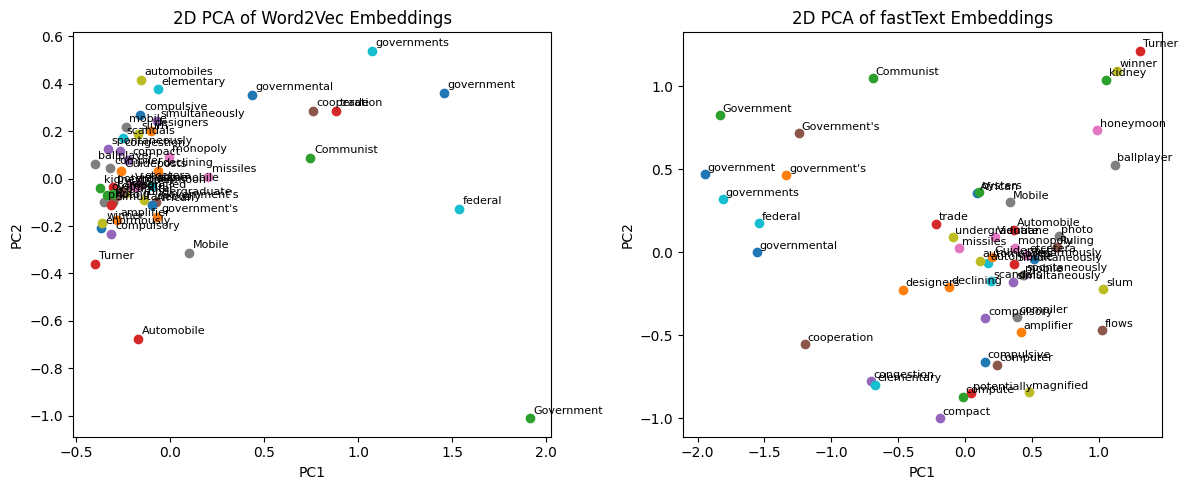

In [ ]:
plt.figure(figsize=(12, 5))

for i, (coords, title) in enumerate([(coords_w2v, 'Word2Vec'), (coords_ft, 'fastText')], 1):
    plt.subplot(1, 2, i)
    for (x, y), label in zip(coords, words):
        plt.scatter(x, y)
        plt.text(x + 0.02, y + 0.02, label, fontsize=8)

    plt.title(f"2D PCA of {title} Embeddings")
    plt.xlabel("PC1")
    plt.ylabel("PC2")

plt.tight_layout()
plt.show()